In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [110]:
df_fire = pd.read_csv(r"C:\Users\pauli\Desktop\Jan_30\Historical_Wildfires.csv")
df_weather = pd.read_csv(r"C:\Users\pauli\Desktop\Jan_30\HistoricalWeather.csv")
df_weatherForecast = pd.read_csv(r"C:\Users\pauli\Desktop\Jan_30\HistoricalWeatherForecasts.csv")
df_submission = pd.read_csv(r"C:\Users\pauli\Desktop\Jan_30\submission-01-29.csv")
df_vegetation = pd.read_csv(r"C:\Users\pauli\Desktop\Jan_30\VegetationIndex.csv")

In [111]:
df_fire.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R


In [112]:
df_weather.head(2)

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937


In [113]:
df_weatherForecast.head(2)

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,803768.19762,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,803768.19762,24.865765,33.557598,31.647308,2.276068


In [114]:
df_submission.head(2)

,Region,Date,Estimated_fire_area
0,NSW,1/23/2021,15.7825
1,NSW,1/24/2021,18.8000


In [115]:
df_vegetation.head(5)

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151


In [116]:
df_fire['Date'] = pd.to_datetime(df_fire['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_vegetation['Date'] = pd.to_datetime(df_vegetation['Date'])

In [117]:
df_fire['year_month'] = df_fire['Date'].dt.to_period('M')
df_vegetation['year_month'] = df_vegetation['Date'].dt.to_period('M')

In [118]:
df_fire=df_fire.merge(df_vegetation, on=['year_month','Region'], how='left')

In [119]:
df_fire.rename(columns={'Date_x': 'Date'}, inplace=True)

df_fire = df_fire.merge(
    df_weather[df_weather['Parameter'] == 'Precipitation'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fire.rename(columns={'mean()': 'Precipitation'}, inplace=True)

df_fire = df_fire.merge(
    df_weather[df_weather['Parameter'] == 'RelativeHumidity'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fire.rename(columns={'mean()': 'RelativeHumidity'}, inplace=True)

df_fire = df_fire.merge(
    df_weather[df_weather['Parameter'] == 'SoilWaterContent'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fire.rename(columns={'mean()': 'SoilWaterContent'}, inplace=True)

df_fire = df_fire.merge(
    df_weather[df_weather['Parameter'] == 'SolarRadiation'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fire.rename(columns={'mean()': 'SolarRadiation'}, inplace=True)

df_fire = df_fire.merge(
    df_weather[df_weather['Parameter'] == 'Temperature'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fire.rename(columns={'mean()': 'Temperature'}, inplace=True)

df_fire = df_fire.merge(
    df_weather[df_weather['Parameter'] == 'WindSpeed'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fire.rename(columns={'mean()': 'WindSpeed'}, inplace=True)

In [120]:
df = df_fire.drop(columns=['Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power', 'Mean_confidence',
                           'Std_confidence', 'Var_confidence', 'Count', 'Replaced', 'year_month',
                           'Date_y', ])

In [121]:
df.head()

,Region,Date,Estimated_fire_area,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,Precipitation,RelativeHumidity,SoilWaterContent,SolarRadiation,Temperature,WindSpeed
0,NSW,2005-01-04,8.68000,0.349202,0.9972,-0.2,0.204862,0.041968,2.808620,57.095628,0.214293,22.617291,23.055527,4.841764
1,NSW,2005-01-05,16.61125,0.349202,0.9972,-0.2,0.204862,0.041968,0.157935,47.170735,0.203951,28.076835,22.425765,4.014080
2,NSW,2005-01-06,5.52000,0.349202,0.9972,-0.2,0.204862,0.041968,0.434833,39.874638,0.193668,30.561703,20.621405,4.477879
3,NSW,2005-01-07,6.26400,0.349202,0.9972,-0.2,0.204862,0.041968,0.064224,39.279410,0.183778,32.143718,19.632722,4.017578
4,NSW,2005-01-08,5.40000,0.349202,0.9972,-0.2,0.204862,0.041968,0.203352,42.400824,0.175935,29.347715,21.477315,3.884550


In [122]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [123]:
df.drop_duplicates(subset=['Region', 'Date'], keep='first', inplace=True)

In [124]:
df_train = df.query('Date < "2020-01-01"')
df_test = df.query('Date >= "2020-01-01" and Date < "2020-02-01"')

In [125]:
regionai = list(df_train['Region'].unique())

In [126]:
def filtras(reg):
    df_filtered = df_train[df_train['Region'] == reg]
    Y_target = df_filtered['Estimated_fire_area']
    X_features = df_filtered.drop(columns=['Estimated_fire_area', 'Date', 'Region'])

    X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.15, random_state=0)
    
    return X_train, X_test, y_train, y_test

In [127]:
def DTR(X_train, y_train, reg):

    regressor = DecisionTreeRegressor(random_state=42)

    regressor.fit(X_train, y_train)

    # y_pred = regressor.predict(X_test)
    # score = r2_score(y_test, y_pred)
    # print(f"R² score: {score:.2f}")
    
    df_filtered = df_test[df_test['Region'] == reg]
    Y_target = df_filtered['Estimated_fire_area']
    X_features = df_filtered.drop(columns=['Estimated_fire_area', 'Date', 'Region'])
    dienos = df_filtered['Day']

    y_pred = regressor.predict(X_features)
    
    score = r2_score(df_filtered['Estimated_fire_area'], y_pred)
    mae = mean_absolute_error(df_filtered['Estimated_fire_area'], y_pred)
    mape = np.mean(np.abs((df_filtered['Estimated_fire_area'] - y_pred) / df_filtered['Estimated_fire_area'])) * 100
    
    return y_pred, Y_target, dienos, score, mae, mape

In [128]:
def RFR(X_train, y_train, reg):

    regressor = RandomForestRegressor(random_state=42)

    regressor.fit(X_train, y_train)

    # y_pred = regressor.predict(X_test)
    # score = r2_score(y_test, y_pred)
    # print(f"R² score: {score:.2f}")
    
    df_filtered = df_test[df_test['Region'] == reg]
    Y_target = df_filtered['Estimated_fire_area']
    X_features = df_filtered.drop(columns=['Estimated_fire_area', 'Date', 'Region'])
    dienos = df_filtered['Day']

    y_pred = regressor.predict(X_features)
    
    score = r2_score(df_filtered['Estimated_fire_area'], y_pred)
    mae = mean_absolute_error(df_filtered['Estimated_fire_area'], y_pred)
    mape = np.mean(np.abs((df_filtered['Estimated_fire_area'] - y_pred) / df_filtered['Estimated_fire_area'])) * 100
    
    return y_pred, Y_target, dienos, score, mae, mape

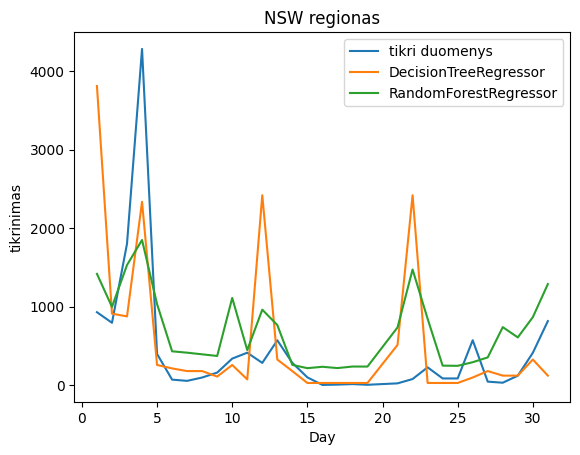

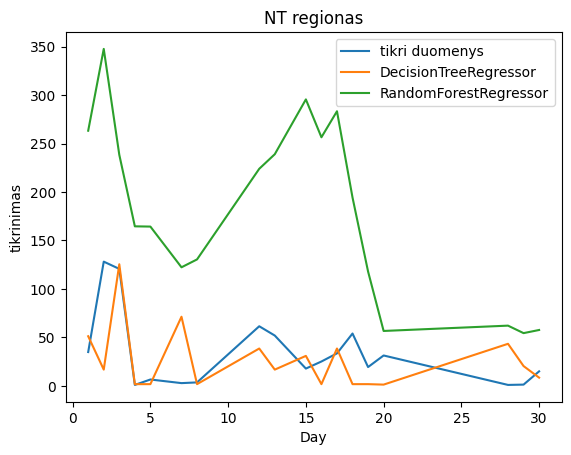

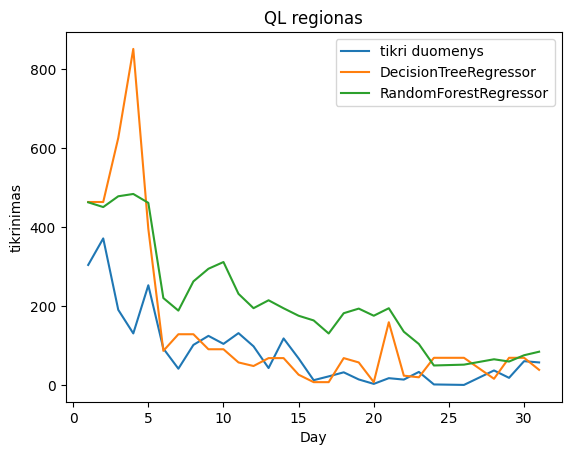

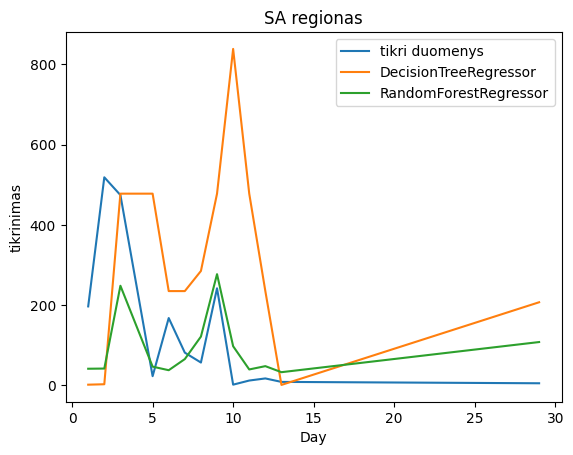

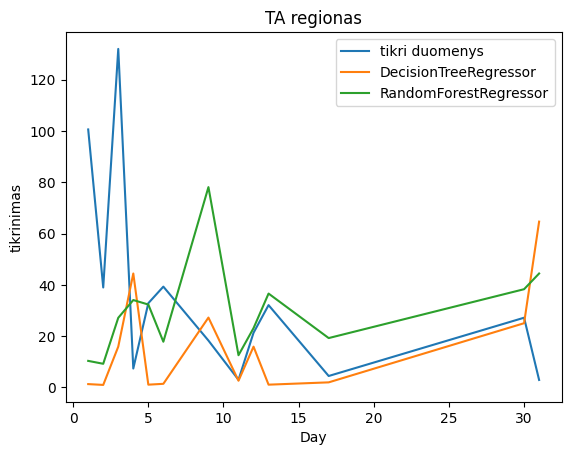

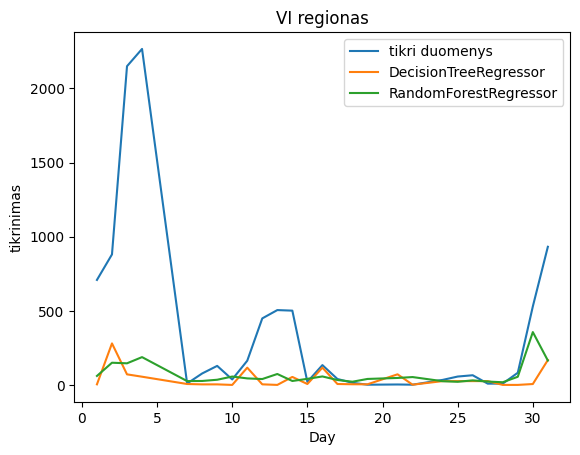

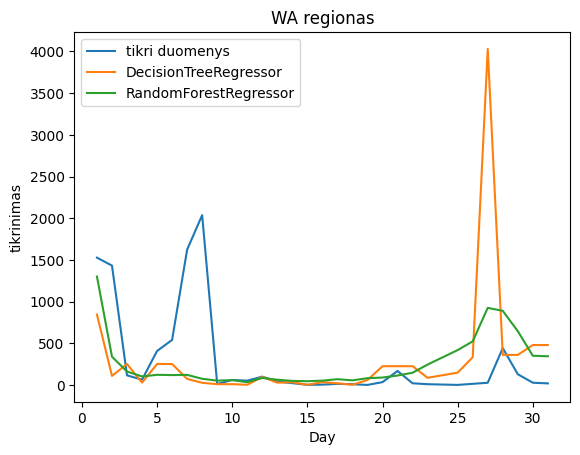

In [129]:
for i in regionai:
    X_train, X_test, y_train, y_test = filtras(i)
    y_pred, Y_target, dienos, r2, mae, mape = DTR(X_train, y_train, i)
    df_test1 = df_test[df_test['Region'] == i].copy()
    df_test1['spejimas'] = y_pred
    df_test1['tikrinimas'] = Y_target

    sns.lineplot(data=df_test1, x='Day', y='tikrinimas', label='tikri duomenys')
    sns.lineplot(data=df_test1, x='Day', y='spejimas', label='DecisionTreeRegressor')
    plt.title(f'{i} regionas')

    y_pred, Y_target, dienos, r2, mae, mape = RFR(X_train, y_train, i)
    df_test1 = df_test[df_test['Region'] == i].copy()
    df_test1['spejimas'] = y_pred
    df_test1['tikrinimas'] = Y_target
    sns.lineplot(data=df_test1, x='Day', y='spejimas', label='RandomForestRegressor')
    plt.show()

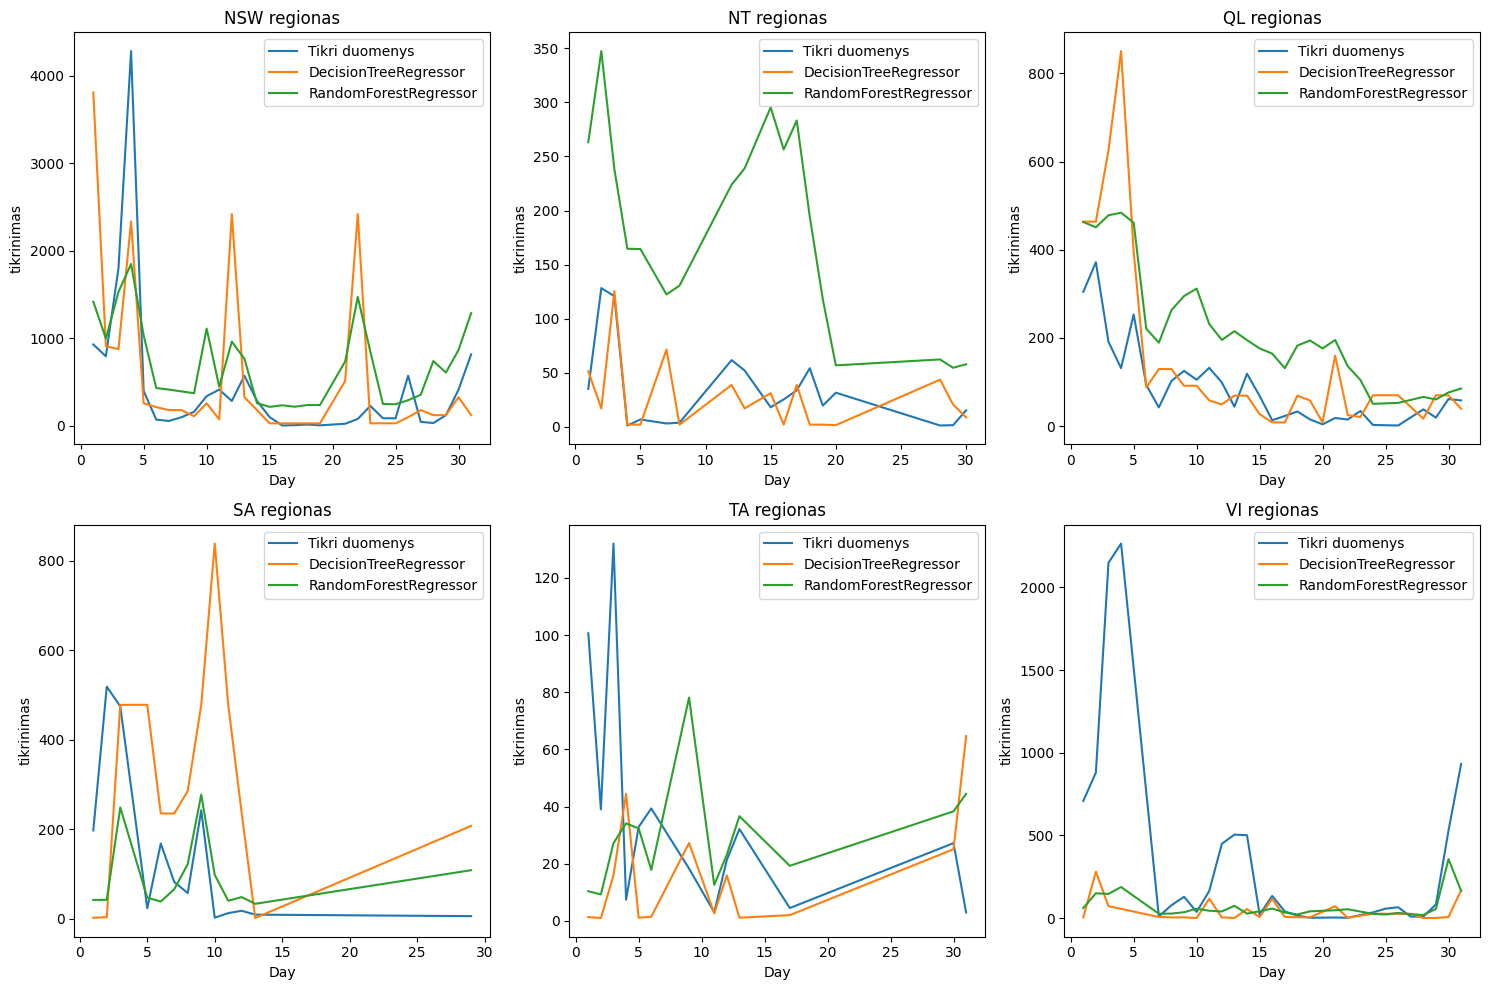

In [130]:
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

axes = axes.flatten()

scorer2DTR=[]
scorer2RFR=[]
mean_absolute_errorDTR=[]
mean_absolute_errorRFR=[]
mean_absolute_percentage_errorDTR=[]
mean_absolute_percentage_errorRFR=[]

for idx, i in enumerate(regionai):
    X_train, X_test, y_train, y_test = filtras(i)
    
    y_pred, Y_target, dienos, r2, mae, mape = DTR(X_train, y_train, i)
    df_test1 = df_test[df_test['Region'] == i].copy()
    df_test1['spejimas'] = y_pred
    df_test1['tikrinimas'] = Y_target
    scorer2DTR.append(round(r2, 1))
    mean_absolute_errorDTR.append(round(mae,1))
    mean_absolute_percentage_errorDTR.append(round(mape, 1))
    
    sns.lineplot(data=df_test1, x='Day', y='tikrinimas', label='Tikri duomenys', ax=axes[idx])
    sns.lineplot(data=df_test1, x='Day', y='spejimas', label='DecisionTreeRegressor', ax=axes[idx])
    
    y_pred, Y_target, dienos, r2, mae, mape = RFR(X_train, y_train, i)
    df_test1['spejimas'] = y_pred
    scorer2RFR.append(round(r2, 1))
    mean_absolute_errorRFR.append(round(mae, 1))
    mean_absolute_percentage_errorRFR.append(round(mape, 1))
    
    sns.lineplot(data=df_test1, x='Day', y='spejimas', label='RandomForestRegressor', ax=axes[idx])
    
    axes[idx].set_title(f'{i} regionas')
    
    if idx >= rows * cols - 1:
        break

plt.tight_layout()
plt.show()

In [131]:
print('r2_score, Desision Tree Regressor', scorer2DTR)
print('mean_absolute_error, Desision Tree Regressor', mean_absolute_errorDTR)
print('mean_absolute_percentage_error, Desision Tree Regressor', mean_absolute_percentage_errorDTR)

r2_score, Desision Tree Regressor [-0.2, -0.1, -2.4, -3.4, -0.9, -0.2]
mean_absolute_error, Desision Tree Regressor [470.3, 26.4, 84.7, 275.5, 36.3, 329.3]
mean_absolute_percentage_error, Desision Tree Regressor [np.float64(411.5), np.float64(502.1), np.float64(366.4), np.float64(4119.6), np.float64(255.7), np.float64(139.0)]


In [132]:
print('r2_score, Random Forrest Regressor', scorer2RFR)
print('mean_absolute_error, Random Forrest Regressor', mean_absolute_errorRFR)
print('mean_absolute_percentage_error, Random Forrest Regressor', mean_absolute_percentage_errorRFR)

r2_score, Random Forrest Regressor [0.4, -18.8, -1.8, 0.1, -0.5, -0.1]
mean_absolute_error, Random Forrest Regressor [458.3, 147.9, 130.6, 108.3, 32.1, 310.5]
mean_absolute_percentage_error, Random Forrest Regressor [np.float64(1655.7), np.float64(2360.6), np.float64(604.4), np.float64(607.3), np.float64(239.6), np.float64(240.9)]
